# Water Quality Analysis
## By Shawn Hwang

Water is a vital resource necessary for all life. However, water quality is easily susceptible to a multitude of threats, such as acidity, pH, and pollution. This is why water quality prediction is so important, the sample data used in this data set can be used to predict water quality in the future. Being able to accurately predict water quality is important because it allows us time to identify threats and take precautionary measures to protect water quality in specific regions. The results of this project may be used to influence environmental agencies with their decision making about water quality.

I observed a data set from the National Science Foundation that contained historical data of water quality using factors such as pH, dissolved oxygen, temperature, and specific conductance. This data set of collected samples from 36 sites, provides adequate information about pH in Georgia. I will perform EDA on this set of data using different visuals while analyzing trends observed in the visuals as well as perform Ransac’s Regression, and K-NN regression.
Original Dataset: https://archive.ics.uci.edu/dataset/733/water+quality+prediction-1

Goal: Develop a predictive model using data science techniques to best predict water qual in the futuure.
Impact/Significance: Being able to predict the future quality of water allows for us to determine future threats to water.


## Libraries 

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Data Collection
#Data Cleaning
water_qal_df = pd.read_csv("cs105_FinalProject - data.csv")
data_df = pd.read_csv("cs105_FinalProject - data.csv")
# data_df.head()


## File Cleaning and Processing

In [6]:
water_it = 1
col1 = pd.DataFrame()
col2 = pd.DataFrame()
col3 = pd.DataFrame()
col4 = pd.DataFrame()
col5 = pd.DataFrame()
col6 = pd.DataFrame()
col7 = pd.DataFrame()
col8 = pd.DataFrame()
col9 = pd.DataFrame()
col10 = pd.DataFrame()
col11 = pd.DataFrame()
sites = []
site_num = 1
for water_it in range(len(water_qal_df.columns)):
    j = 0
    temp = 0
    if water_it % 11 == 1:
        col1 = pd.concat([col1,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 2:
        col2 = pd.concat([col2,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 3:
        col3 = pd.concat([col3,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 4:
        col4 = pd.concat([col4,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 5:
        col5 = pd.concat([col5,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 6:
        col6 = pd.concat([col6,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 7:
        col7 = pd.concat([col7,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 8:
        col8 = pd.concat([col8,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 9:
        col9 = pd.concat([col9,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 10:
        col10 = pd.concat([col10,water_qal_df.iloc[:,water_it]], ignore_index=True)
    if water_it % 11 == 0:
        col11 = pd.concat([col11,water_qal_df.iloc[:,water_it]], ignore_index=True)
        temp = [site_num for i in range(water_qal_df.shape[0])]
        sites = sites + temp
        site_num = site_num + 1
        
sitecol = pd.DataFrame(sites)
print(sitecol)
new_water_pd = pd.DataFrame()
new_water_pd["spec_max"] = col1
new_water_pd["ph_max"] = col2
new_water_pd["ph_min"] = col3
new_water_pd["spec_min"] = col4
new_water_pd["spec_mean"] = col5
new_water_pd["oxy_max"] = col6
new_water_pd["oxy_mean"] = col7
new_water_pd["oxy_min"] = col8
new_water_pd["temp_mean"] = col9
new_water_pd["temp_min"] = col10
new_water_pd["Site"] = sitecol #pd.Series(sites)
new_water_pd["temp_max"] = col11

#print(new_water_pd)
data_df.head()

        0
0       1
1       1
2       1
3       1
4       1
...    ..
15646  37
15647  37
15648  37
15649  37
15650  37

[15651 rows x 1 columns]


,Var1_1,Var1_2,Var1_3,Var1_4,Var1_5,Var1_6,Var1_7,Var1_8,Var1_9,Var1_10,...,Var1_398,Var1_399,Var1_400,Var1_401,Var1_402,Var1_403,Var1_404,Var1_405,Var1_406,Var1_407
0,0.001131,0.00117,0.001326,0.014094,0.088109,0.001326,0.002963,0.070760,0.518519,0.004230,...,0.284884,0.290698,0.276163,0.264535,0.258721,0.293605,0.279070,0.284884,0.215116,0.252907
1,0.001131,0.00117,0.001345,0.017154,0.041131,0.001462,0.001696,0.082066,0.524366,0.004288,...,0.279070,0.281977,0.261628,0.247093,0.238372,0.279070,0.261628,0.279070,0.220930,0.273256
2,0.001131,0.00117,0.001384,0.064327,0.092398,0.001540,0.001618,0.092982,0.551657,0.004308,...,0.284884,0.293605,0.276163,0.261628,0.250000,0.296512,0.284884,0.279070,0.226744,0.302326
3,0.001131,0.00117,0.001345,0.101559,0.220273,0.001384,0.001520,0.117739,0.588694,0.004464,...,0.313953,0.337209,0.308140,0.299419,0.299419,0.340116,0.343023,0.293605,0.235465,0.409884
4,0.001131,0.00117,0.001365,0.166667,0.214425,0.001345,0.001501,0.170955,0.619883,0.004308,...,0.383721,0.395349,0.369186,0.363372,0.363372,0.409884,0.386628,0.311047,0.244186,0.453488


# Radar Plot

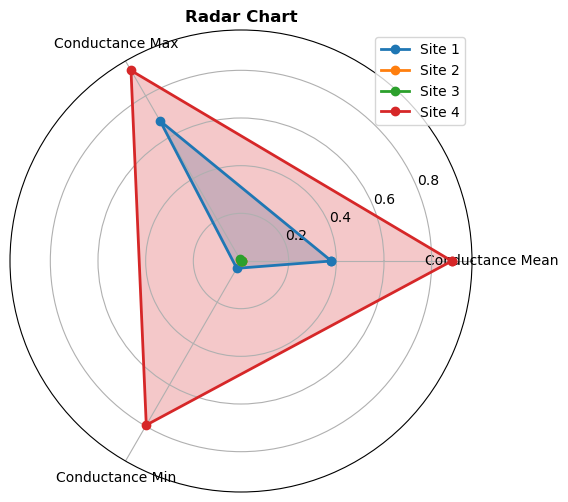

In [8]:
subject1_labels = ['Conductance Mean', 'Conductance Max', 'Conductance Min']
subject1_data = [data_df['Var1_5'].mean(), data_df['Var1_5'].max(), data_df['Var1_5'].min()]

subject2_labels = ['Conductance Mean', 'Conductance Max', 'Conductance Min']
subject2_data = [data_df['Var1_16'].mean(), data_df['Var1_16'].max(), data_df['Var1_16'].min()]

subject3_labels = ['Conductance Mean', 'Conductance Max', 'Conductance Min']
subject3_data = [data_df['Var1_27'].mean(), data_df['Var1_27'].max(), data_df['Var1_27'].min()]

subject4_labels = ['Conductance Mean', 'Conductance Max', 'Conductance Min']
subject4_data = [data_df['Var1_38'].mean(), data_df['Var1_38'].max(), data_df['Var1_38'].min()]

num_variables = len(subject1_labels)

angles = np.linspace(0, 2* np.pi, num_variables, endpoint=False).tolist()

subject1_data.append(subject1_data[0])
subject2_data.append(subject2_data[0])
subject3_data.append(subject3_data[0])
subject4_data.append(subject4_data[0])

angles.append(angles[0])

fig, ax = plt.subplots(figsize= (6,6), subplot_kw = {'polar': True})
ax.plot(angles, subject1_data, 'o-', linewidth = 2, label = 'Site 1')
ax.fill(angles, subject1_data, alpha = 0.25)

ax.plot(angles, subject2_data, 'o-', linewidth = 2, label = 'Site 2')
ax.fill(angles, subject2_data, alpha = 0.25)

ax.plot(angles, subject3_data, 'o-', linewidth = 2, label = 'Site 3')
ax.fill(angles, subject3_data, alpha = 0.25)

ax.plot(angles, subject4_data, 'o-', linewidth = 2, label = 'Site 4')
ax.fill(angles, subject4_data, alpha = 0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(subject1_labels)

ax.set_title('Radar Chart', fontweight = 'bold')

ax.legend()
plt.show()

The radar chart represents the specific conductance of the tested water from sites 1- 4. We used the data to find the mean, max, and min of the recorded conductance mean. From this chart it is evident that the conductance of site 4 is a lot higher compared to site 1. Site 1 also has a low conductance minimum compared to its respective mean and max. Site 1's low conductance minimum shows that there is an inconsistency in the concentration of ions in the water solution. Since site 4 has the highest specific conductance, this means that it has a high amount of dissolved-solids, and that it is the worst site for water quality.


# Radar Chart 2

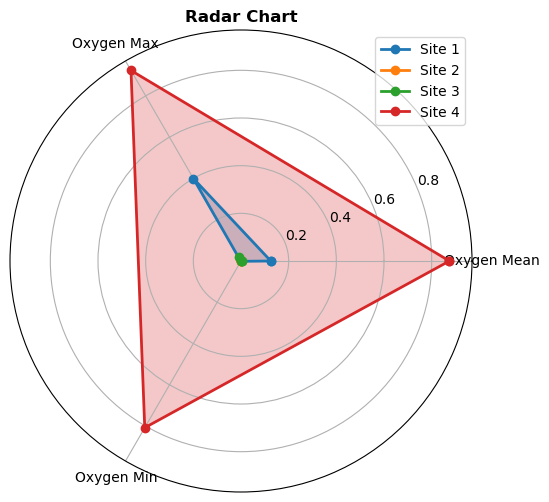

In [11]:
subject1_labels = ['Oxygen Mean', 'Oxygen Max', 'Oxygen Min']
subject1_data = [data_df['Var1_7'].mean(), data_df['Var1_7'].max(), data_df['Var1_7'].min()]

subject2_labels = ['Oxygen Mean', 'Oxygen Max', 'Oxygen Min']
subject2_data = [data_df['Var1_18'].mean(), data_df['Var1_18'].max(), data_df['Var1_18'].min()]

subject3_labels = ['Oxygen Mean', 'Oxygen Max', 'Oxygen Min']
subject3_data = [data_df['Var1_29'].mean(), data_df['Var1_29'].max(), data_df['Var1_29'].min()]

subject4_labels = ['Oxygen Mean', 'Oxygen Max', 'Oxygen Min']
subject4_data = [data_df['Var1_40'].mean(), data_df['Var1_40'].max(), data_df['Var1_40'].min()]

num_variables = len(subject1_labels)

angles = np.linspace(0, 2* np.pi, num_variables, endpoint=False).tolist()

subject1_data.append(subject1_data[0])
subject2_data.append(subject2_data[0])
subject3_data.append(subject3_data[0])
subject4_data.append(subject4_data[0])


angles.append(angles[0])

fig, ax = plt.subplots(figsize= (6,6), subplot_kw = {'polar': True})
ax.plot(angles, subject1_data, 'o-', linewidth = 2, label = 'Site 1')
ax.fill(angles, subject1_data, alpha = 0.25)

ax.plot(angles, subject2_data, 'o-', linewidth = 2, label = 'Site 2')
ax.fill(angles, subject2_data, alpha = 0.25)

ax.plot(angles, subject3_data, 'o-', linewidth = 2, label = 'Site 3')
ax.fill(angles, subject3_data, alpha = 0.25)

ax.plot(angles, subject4_data, 'o-', linewidth = 2, label = 'Site 4')
ax.fill(angles, subject4_data, alpha = 0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(subject1_labels)

ax.set_title('Radar Chart', fontweight = 'bold')

ax.legend()
plt.show()

This radar chart represents the amount of "DO" Dissolved Oxygen in the water for sites 1-4. The chart demonstrates a similar trend to that of the specific conductance radar chart. Site 1, has a very low minimum compared to the max and its mean. Low DO is caused by an increase in nitrogen or phosphorus. Increases in water temperature can also cause lower DO, the following graph will show this relation. Lower DO is considered bad for water quality as it means that there is not enough oxygen to support aquatic life which causes hypoxia.

# Radar Chart 3


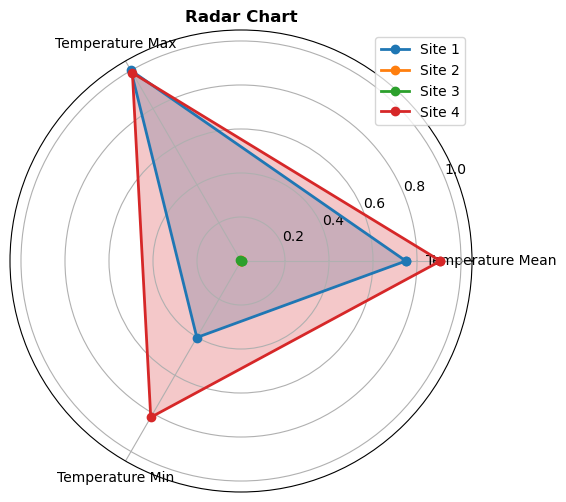

In [14]:
subject1_labels = ['Temperature Mean', 'Temperature Max', 'Temperature Min']
subject1_data = [data_df['Var1_9'].mean(), data_df['Var1_9'].max(), data_df['Var1_9'].min()]

subject2_labels = ['Temperature Mean', 'Temperature Max', 'Temperature Min']
subject2_data = [data_df['Var1_20'].mean(), data_df['Var1_20'].max(), data_df['Var1_20'].min()]

subject3_labels = ['Temperature Mean', 'Temperature Max', 'Temperature Min']
subject3_data = [data_df['Var1_31'].mean(), data_df['Var1_31'].max(), data_df['Var1_31'].min()]

subject4_labels = ['Temperature Mean', 'Temperature Max', 'Temperature Min']
subject4_data = [data_df['Var1_42'].mean(), data_df['Var1_42'].max(), data_df['Var1_42'].min()]

num_variables = len(subject1_labels)

angles = np.linspace(0, 2* np.pi, num_variables, endpoint=False).tolist()

subject1_data.append(subject1_data[0])
subject2_data.append(subject2_data[0])
subject3_data.append(subject3_data[0])
subject4_data.append(subject4_data[0])


angles.append(angles[0])

fig, ax = plt.subplots(figsize= (6,6), subplot_kw = {'polar': True})
ax.plot(angles, subject1_data, 'o-', linewidth = 2, label = 'Site 1')
ax.fill(angles, subject1_data, alpha = 0.25)

ax.plot(angles, subject2_data, 'o-', linewidth = 2, label = 'Site 2')
ax.fill(angles, subject2_data, alpha = 0.25)

ax.plot(angles, subject3_data, 'o-', linewidth = 2, label = 'Site 3')
ax.fill(angles, subject3_data, alpha = 0.25)

ax.plot(angles, subject4_data, 'o-', linewidth = 2, label = 'Site 4')
ax.fill(angles, subject4_data, alpha = 0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(subject1_labels)

ax.set_title('Radar Chart', fontweight = 'bold')

ax.legend()
plt.show()

This radar chart represents the temperature of the water in degrees Celsius. The mean, max, and minimum temperatures were recorded. The chart shows that sites 1 and 4 have similar temperatures which is different from the comparison between the site 1 and 4 for the conductance chart. However, we can observe a similar shape for both conductance and temeperature which shows the relation between the two traits. Sites 2 and 3 remain minimal compared to the other 2.

# Heat Map

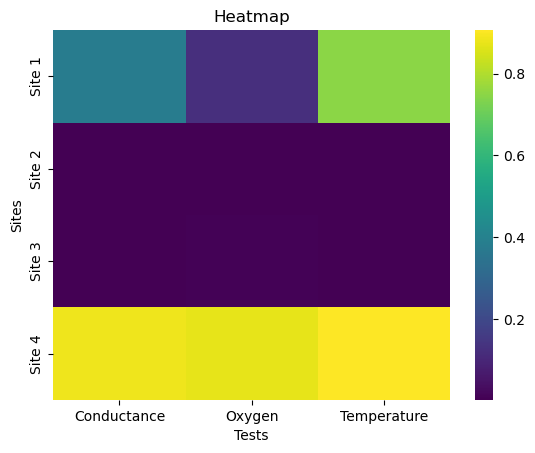

In [17]:
sites = ['Site 1', 'Site 2', 'Site 3', 'Site 4']
tests = ['Conductance', 'Oxygen', 'Temperature']

data = np.array([
    [water_qal_df['Var1_5'].mean(), water_qal_df['Var1_7'].mean(), water_qal_df['Var1_9'].mean()],
    [water_qal_df['Var1_16'].mean(), water_qal_df['Var1_18'].mean(), water_qal_df['Var1_20'].mean()],
    [water_qal_df['Var1_27'].mean(), water_qal_df['Var1_29'].mean(), water_qal_df['Var1_31'].mean()],
    [water_qal_df['Var1_38'].mean(), water_qal_df['Var1_40'].mean(), water_qal_df['Var1_42'].mean()]
])

sns.heatmap(data, cmap='viridis', xticklabels=tests, yticklabels=sites)

plt.title('Heatmap')
plt.xlabel('Tests')
plt.ylabel('Sites')
plt.show()

After analyzing the data, I constructed a heatmap that displays the average means for specific conductance, dissolved oxygen (DO), and temperature for the 4 specific sites. This heat map shows the data is inconsistent for the 4 sites and that we need to utilize regression to further analyze the data. There does not seem to be any pattern across the sites except the mid-region of the map.

# Scatter Plot with KNN Regression

In [53]:
water_pd = pd.DataFrame()

water_pd["ph_max"] = col2
water_pd["ph_min"] = col3
water_pd["spec_mean"] = col5
water_pd["oxy_mean"] = col7
water_pd["temp_mean"] = col9
water_pd["Site"] = sitecol


Axes(0.125,0.11;0.775x0.77)


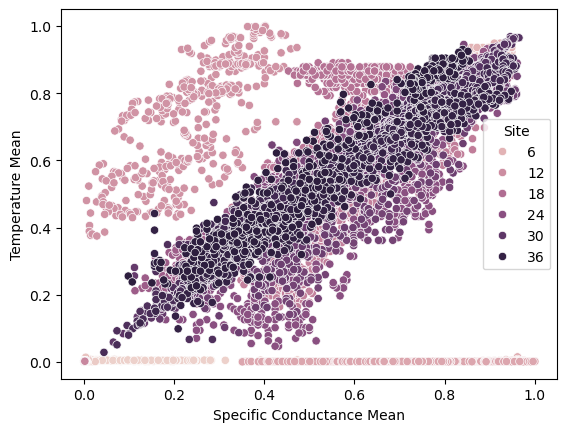

In [239]:
sp = sns.scatterplot(data = water_pd, x = 'spec_mean', y = 'temp_mean', hue = 'Site')
plt.xlabel('Specific Conductance Mean')
plt.ylabel('Temperature Mean')
print(sp)

In [59]:
water_lin_model = LinearRegression()
water_knn_model = KNeighborsRegressor(n_neighbors = 30)

water_lin_model.fit(X=water_pd[["ph_max", "ph_min", "spec_mean", "oxy_mean"]], y = water_pd["temp_mean"])
water_knn_model.fit(X=water_pd[["ph_max", "ph_min", "spec_mean", "oxy_mean"]], y = water_pd["temp_mean"])

KNeighborsRegressor(n_neighbors=30)

In [75]:
knn_predictions = water_knn_model.predict(X=water_pd[["ph_max", "ph_min", "spec_mean", "oxy_mean"]])
print(knn_predictions)

comparison = pd.DataFrame({
    "Actual": water_pd["temp_mean"],
    "Predicted": knn_predictions
})

print(comparison)

[0.0036514  0.00428248 0.00415465 ... 0.47554669 0.55662179 0.58257519]
         Actual  Predicted
0      0.004230   0.003651
1      0.004288   0.004282
2      0.004308   0.004155
3      0.004464   0.004399
4      0.004308   0.004734
...         ...        ...
15646  0.511628   0.559919
15647  0.494186   0.505361
15648  0.465116   0.475547
15649  0.433140   0.556622
15650  0.462209   0.582575

[15651 rows x 2 columns]


This scatter plot shows the correlation between the mean temperature and specific conductive of the water in the observed sites. Our graph is shaded on 2 areas of the graph where locations were taken. There is a positive correlation between these 2 variables despite a few outliers. From this graph, we can show that as specific conductivity rises so does average temperature. 
By using KNN I got a list of all predictions for the temp_mean, by printing the comparison variable you can see the difference between the actual means and predicted means for temperature. Overall, the numbers are close together, which means that it did a good job fitting and predicting the data.

# K-NN

C:\Users\shawn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


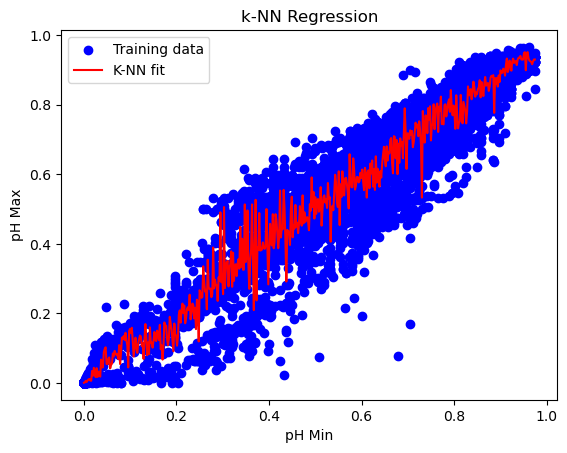

In [117]:
X = water_pd[["ph_min"]]
y = water_pd[["ph_max"]]

# Split data into training and testing sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.4, random_state=42)

best_k = 1
lw_MSE = mean_squared_error(y_te, y_pred) 
k_list = list(range(1, 31))  # k values from 1 to 30

# find the best k
for curr_k in k_list:
    water_knn_model = KNeighborsRegressor(n_neighbors=curr_k)
    water_knn_model.fit(X_tr, y_tr)
    y_pred = water_knn_model.predict(X_te)
    temp_MSE = mean_squared_error(y_te, y_pred)  # Compute MSE for current k
    
    if temp_MSE < lw_MSE:
        best_k = curr_k
        lw_MSE = temp_MSE

# Plotting the results
T = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)  # Reshape to (500, 1) for prediction
water_knn_model = KNeighborsRegressor(n_neighbors=best_k)
water_knn_model.fit(X_tr, y_tr)
lin = water_knn_model.predict(T)

plt.scatter(X_tr, y_tr, color='blue', label='Training data')
plt.plot(T, lin, color='red', label='K-NN fit')
plt.xlabel('pH Min')
plt.ylabel('pH Max')
plt.title('k-NN Regression')
plt.legend()
plt.show()

KNN regression makes use of the nearest neighbors algorithm but continously predicts the output based off "k" nearest neighbors rather than the whole data set. In this case, pH min, specific conductance, temperature mean, and dissolved oxygen mean are being used to predict pH max. There is a strong correlation data in the data.

# Ransac's Linear Regression

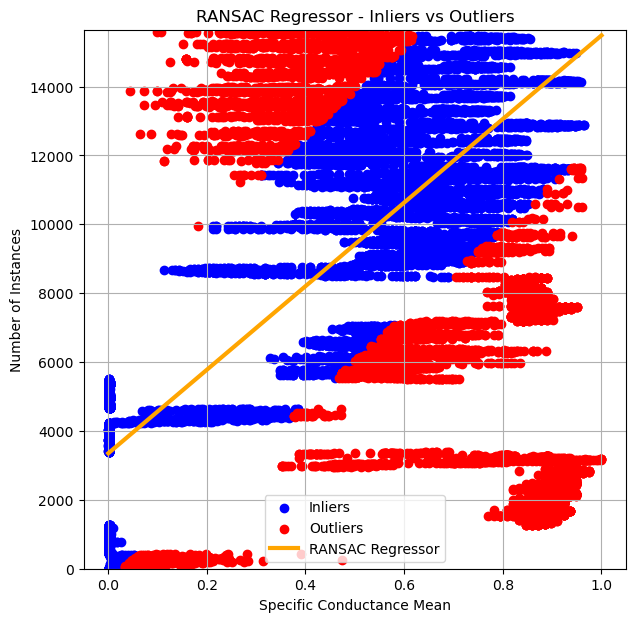

In [232]:

# Define x and y
x = water_pd[['spec_mean']].values
y = np.arange(len(water_pd))  # Example for number of instances

# Standardize x
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Initialize and fit the RANSAC Regressor
ransac = RANSACRegressor()
ransac.fit(x_scaled, y)

# Get inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Plot the results
plt.figure(figsize=(7, 7))
plt.scatter(x[inlier_mask], y[inlier_mask], color='blue', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask], color='red', label='Outliers')

# Create line for RANSAC predictions
line_x = np.linspace(min(x), max(x), 100).reshape(-1, 1)  # Use linspace for smooth line
line_x_scaled = scaler.transform(line_x)
line_y_ransac = ransac.predict(line_x_scaled)

plt.plot(line_x, line_y_ransac, color='orange', lw=3, label='RANSAC Regressor')
plt.ylim(0, len(water_pd)
plt.xlabel('Specific Conductance Mean')
plt.ylabel('Number of Instances')
plt.title('RANSAC Regressor - Inliers vs Outliers')
plt.legend()
plt.grid(True)
plt.show()

This Ransac regressor highlights the amount of outlier and inliers that exists within all instances of the data set. The line of best fit is created to show the identified inliers. I use this method as a way to detect outliers that exist within the data set. As you can see, the regressor clearly highlights the large seperation between outliers and inliers.ffff

# Conclusion


In my research project, the goal was to leverage machine learning algorithms and exploratory data analysis (EDA) to visualize trends, detect poor water quality, and predict future water-related issues. By creating various plots, I was able to identify patterns and understand the relationships between different water variables. Using RANSAC's Linear Regression, I assessed the impact of outliers on the dataset and evaluated the model's performance under noisy conditions. The k-Nearest Neighbors (K-NN) algorithm was employed to predict a line of best fit for water pH levels. A pH range of 6.5 to 8.5 indicates safe drinking water; therefore, any deviation from this range would signal potential concerns. By continuously analyzing new data with these methods, it is possible to track changes in water quality and provide actionable insights for addressing potential issues.